In [2]:
import pandas as pd
from sklearn.metrics import (
    confusion_matrix,
    RocCurveDisplay,
    roc_curve,
    auc,
    ConfusionMatrixDisplay,
    roc_auc_score,
    accuracy_score,
    f1_score,
    matthews_corrcoef,
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

filename = "/home/adralilla/Documents/Thesis/file_lengths.csv"


In [4]:
df = pd.read_csv(filename, index_col=0)
train_df = df[df["group"] == "train"]
test_df = df[df["group"] == "test"]

In [5]:
def get_thresholds(df, N):
    # Calculate thresholds based on percentiles
    percentiles = np.linspace(0, 100, N + 2)[1:-1]  # Exclude 0 and 100
    thresholds = np.percentile(df["length"], percentiles)
    return thresholds


In [6]:
thresholds = get_thresholds(train_df, train_df.shape[0])
thresholds

array([1.01199814e+03, 1.06597989e+03, 1.06799888e+03, ...,
       7.08026394e+06, 8.21286160e+06, 8.36498394e+06])

In [7]:
def evaluation_of_classification(y_true, y_pred, class_scores):

    try:
        auc = roc_auc_score(y_true, class_scores)
    except ValueError:
        auc = -1
    acc = accuracy_score(y_true, y_pred, normalize=True)
    f1 = f1_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    Np = tp + fn
    Nn = tn + fp
    eval_results = {
        "auc": auc,
        "acc": acc,
        "f1": f1,
        "mcc": mcc,
        "recall": recall,
        "sensitivity": recall,
        "specificity": specificity,
        "tn": tn,
        "fp": fp,
        "fn": fn,
        "tp": tp,
        "Np": Np,
        "Nn": Nn,
    }
    return eval_results


In [6]:
df_res = pd.DataFrame()
y_true = list((train_df.label == "Phages").astype(int))
score = list(train_df.length)
for thres in tqdm(thresholds):
    y_pred = list((train_df.length < thres).astype(int))
    out = evaluation_of_classification(y_true, y_pred, score)
    df_res = pd.concat([df_res, pd.DataFrame([out])], ignore_index=True)

100%|██████████| 10741/10741 [05:39<00:00, 31.64it/s]


In [9]:
#df_res["threshold"] = thresholds
# df_res.to_csv("threshold_test_metrics.csv")
df_res_test = pd.read_csv("./threshold_test_metrics.csv", index_col= 0)
df_res = pd.read_csv("./threshold_metrics.csv", index_col=0)

Text(0, 0.5, 'accuracy')

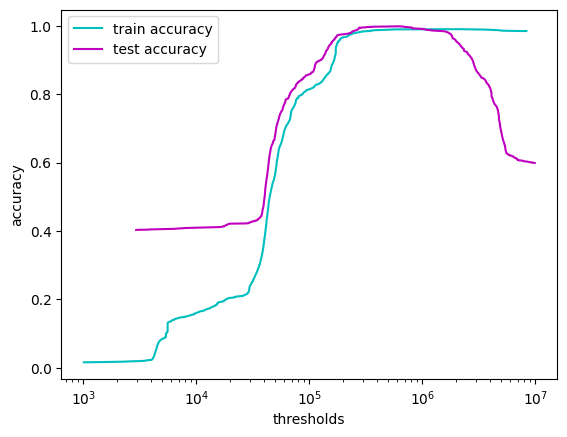

In [11]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(df_res.threshold, df_res.acc, color= "c", label="train accuracy")
ax.plot(df_res_test.threshold, df_res_test.acc, color="m", label = "test accuracy")
ax.set_xscale('log')
ax.legend(loc="upper left")
ax.set_xlabel("thresholds")
ax.set_ylabel("accuracy")

In [14]:
df_res[df_res.acc==np.max(df_res.acc)]

,auc,acc,f1,mcc,recall,sensitivity,specificity,tn,fp,fn,tp,Np,Nn,threshold
10657,0.26813,0.990224,0.995054,0.612481,0.99896,0.99896,0.437126,73,94,11,10563,10574,167,2.131567e+06


In [20]:
df_res_test[df_res_test.acc==np.max(df_res_test.acc)]

,auc,acc,f1,mcc,recall,sensitivity,specificity,tn,fp,fn,tp,Np,Nn,threshold
1031,0.000137,0.998255,0.998543,0.996374,1.0,1.0,0.995658,688.0,3.0,0.0,1028,1028,691,612419.2


Text(0, 0.5, 'mcc')

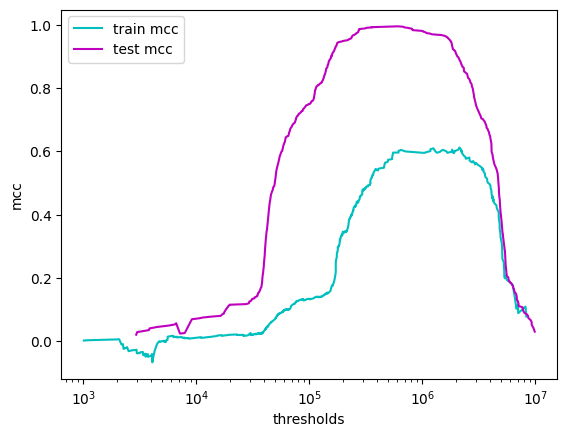

In [12]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(df_res.threshold, df_res.mcc, color= "c", label="train mcc")
ax.plot(df_res_test.threshold, df_res_test.mcc, color="m", label = "test mcc")
ax.set_xscale('log')
ax.legend(loc="upper left")
ax.set_xlabel("thresholds")
ax.set_ylabel("mcc")

In [25]:
df_res[df_res.mcc==np.max(df_res.mcc)]

,auc,acc,f1,mcc,recall,sensitivity,specificity,tn,fp,fn,tp,Np,Nn,threshold
10657,0.26813,0.990224,0.995054,0.612481,0.99896,0.99896,0.437126,73,94,11,10563,10574,167,2.131567e+06


In [26]:
df_res_test[df_res_test.mcc==np.max(df_res_test.mcc)]

,auc,acc,f1,mcc,recall,sensitivity,specificity,tn,fp,fn,tp,Np,Nn,threshold
1031,0.000137,0.998255,0.998543,0.996374,1.0,1.0,0.995658,688.0,3.0,0.0,1028,1028,691,612419.2


Text(0, 0.5, 'f1 score')

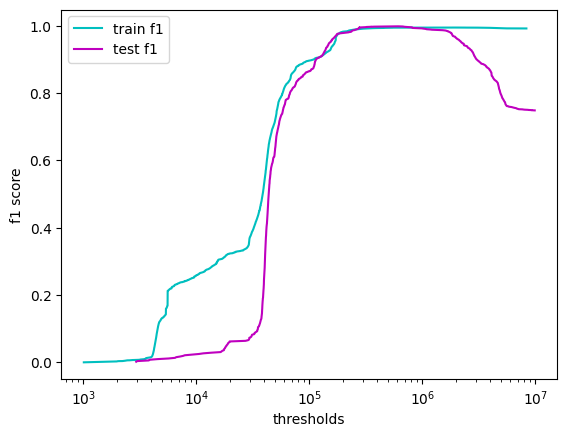

In [13]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(df_res.threshold, df_res.f1, color= "c", label="train f1")
ax.plot(df_res_test.threshold, df_res_test.f1, color="m", label = "test f1")
ax.set_xscale('log')
ax.legend(loc="upper left")
ax.set_xlabel("thresholds")
ax.set_ylabel("f1 score")

In [28]:
df_res[df_res.f1==np.max(df_res.f1)]

,auc,acc,f1,mcc,recall,sensitivity,specificity,tn,fp,fn,tp,Np,Nn,threshold
10657,0.26813,0.990224,0.995054,0.612481,0.99896,0.99896,0.437126,73,94,11,10563,10574,167,2.131567e+06


In [29]:
df_res_test[df_res_test.f1==np.max(df_res_test.f1)]

,auc,acc,f1,mcc,recall,sensitivity,specificity,tn,fp,fn,tp,Np,Nn,threshold
1031,0.000137,0.998255,0.998543,0.996374,1.0,1.0,0.995658,688.0,3.0,0.0,1028,1028,691,612419.2
